## Project: Breast Cancer Diagnosis
##### Reference: https://www.kaggle.com/code/gargmanish/basic-machine-learning-with-cancer/notebook

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

C:\Users\Rahat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('data/data.csv', header=0)

In [3]:
print(data.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [4]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.drop("Unnamed: 32", axis=1, inplace=True)

In [7]:
data.drop("id", axis=1, inplace=True)

In [8]:
# The data can be divided into three parts.lets divied the features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])

In [9]:
# mapping the 'diagnosis' column or label to integer value
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\Rahat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

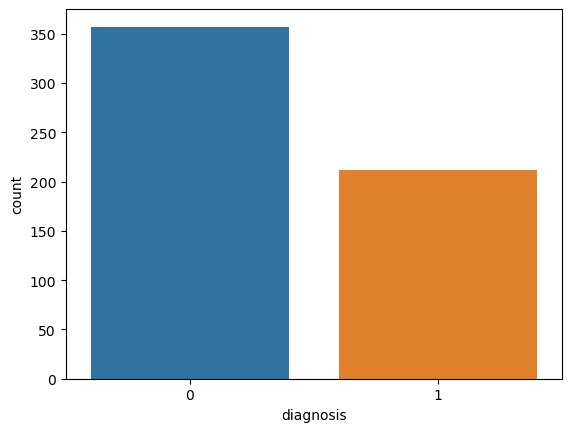

In [11]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

In [12]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Feature selection

<AxesSubplot:>

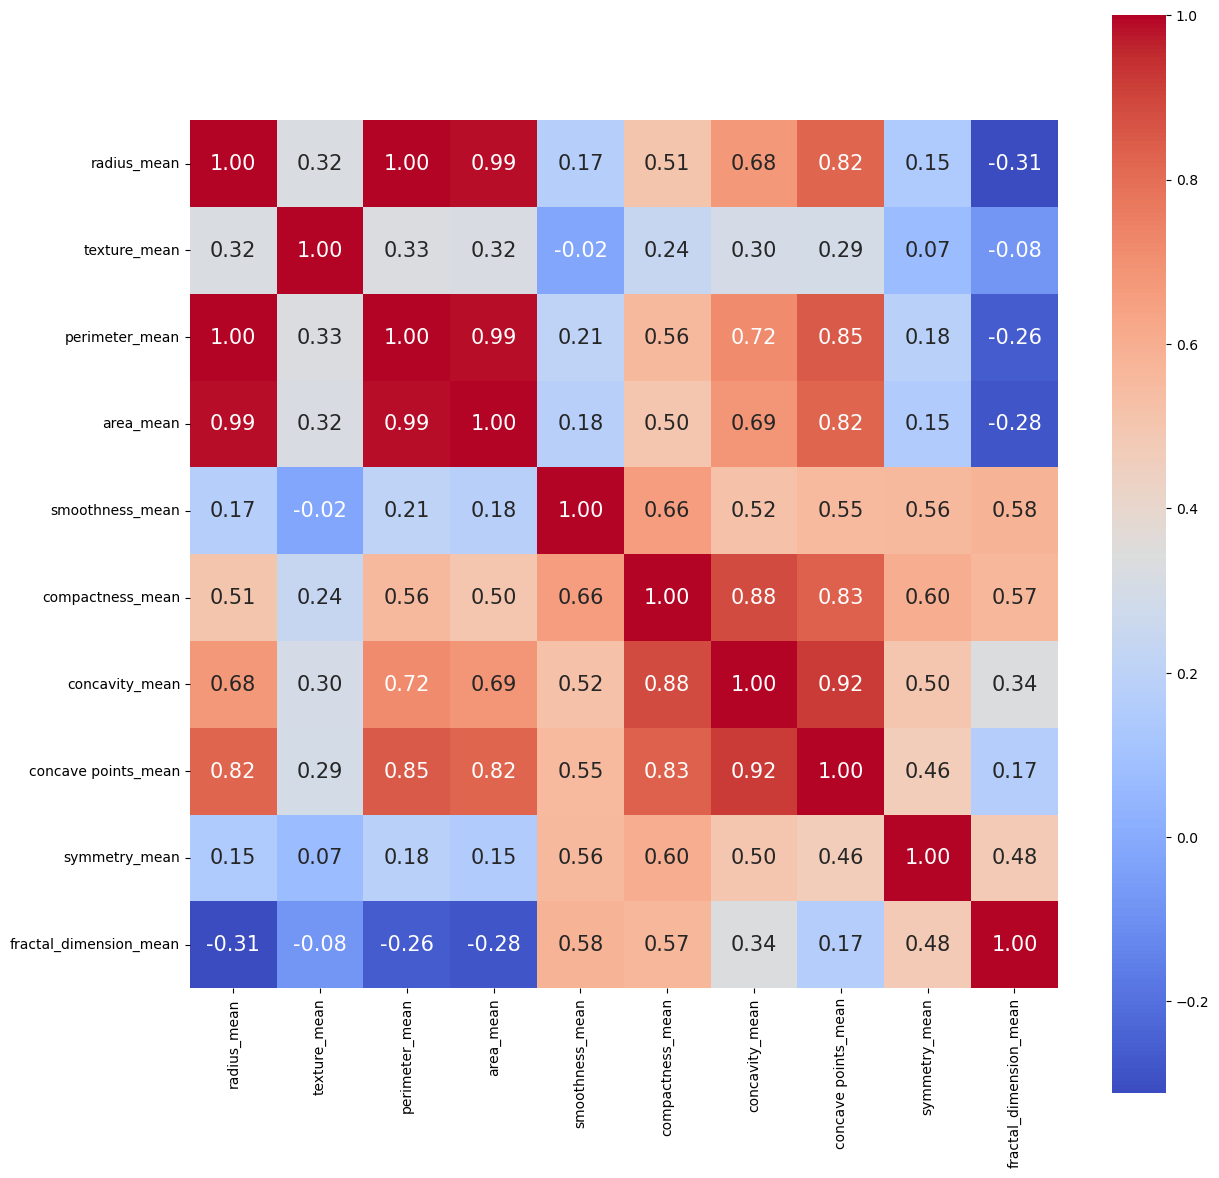

In [13]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

>The 'radius', 'perimeter' and 'area' are highly correlated as expected from their relation so from these we will use anyone of them

>'compactness_mean', 'concavity_mean' and 'concavepoint_mean' are highly correlated so we will use compactness_mean from here

so selected Parameter for use is 'perimeter_mean', 'texture_mean', compactness_mean, symmetry_mean, smoothness_mean

In [14]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [15]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test

In [16]:
print(train.shape, test.shape)

(398, 31) (171, 31)


In [17]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

**Using Random Forest with the selected features only

In [18]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)

In [19]:
score

0.935672514619883

In [20]:
percentage = round(score*100, 2)
print(f"Prediction accuracy(Random Forest): {percentage}%")

Prediction accuracy(Random Forest): 93.57%


**Using SVM with the selected features only

In [21]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(SVM): {percentage}%")

Prediction accuracy(SVM): 91.23%


Now, taking all features_mean so that we can get the importance of features from the Random Forest Model

In [22]:
prediction_var = features_mean

In [23]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

**Using Random Forest with all features_mean

In [24]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(Random Forest): {percentage}%")

Prediction accuracy(Random Forest): 93.57%


In [25]:
# this is the property of Random Forest classifier that it provide us the importance of the features used
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) 

area_mean                 0.208503
concavity_mean            0.197738
concave points_mean       0.193732
perimeter_mean            0.155320
radius_mean               0.081965
texture_mean              0.054701
compactness_mean          0.043198
smoothness_mean           0.027102
symmetry_mean             0.020768
fractal_dimension_mean    0.016974
dtype: float64


**Using SVM with all features_mean

In [26]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(SVM): {percentage}%")

Prediction accuracy(SVM): 86.55%


The prediction accuracy has decreased for taking all features_mean. Let's take top 5 most important features showed by Random Forest

In [27]:
prediction_var = ['concave points_mean', 'concavity_mean', 'perimeter_mean', 'area_mean', 'radius_mean']

In [28]:
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [29]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(Random Forest): {percentage}%")

Prediction accuracy(Random Forest): 92.98%


In [30]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(SVM): {percentage}%")

Prediction accuracy(SVM): 87.13%


So, from this discussion we got multi colinearty effecting our SVM part a lot but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part.
Now lets do with the 3rd part of data which is features_worst

In [31]:
prediction_var = features_worst

In [32]:
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [33]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(SVM): {percentage}%")

Prediction accuracy(SVM): 92.4%


In [34]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(Random Forest): {percentage}%")

Prediction accuracy(Random Forest): 95.91%


In [35]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

radius_worst               0.237818
area_worst                 0.228538
perimeter_worst            0.166950
concave points_worst       0.140135
concavity_worst            0.065942
compactness_worst          0.050887
texture_worst              0.031375
symmetry_worst             0.030823
smoothness_worst           0.027241
fractal_dimension_worst    0.020291
dtype: float64


In [36]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [37]:
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [38]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(Random Forest): {percentage}%")

Prediction accuracy(Random Forest): 94.74%


In [39]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction, test_y)
percentage = round(score*100, 2)
print(f"Prediction accuracy(SVM): {percentage}%")

Prediction accuracy(SVM): 92.4%


**Looking at the better performance, we'll use Random Forest Model

In [ ]:
!git add .
!git commit -m ""